# Lab 14 завдання 2

Файли data_1.txt або data_2.txt містять дані каротажних досліджень свердловин у форматі ‘Depth, Temperature’
1. ✅ Завантажити свій варіант даних (парний або непарний номер у списку групи). Візуалізувати фрагмент даних.
2. ✅ Утворити тренувальний та тестовий набори даних.
3. ✅ Побудувати модель лінійної регресії між глибиною точки виміру і темпе-
ратурою середовища у цій точці.
4. ✅ Візуалізувати дані, виділивши різними кольорами тренувальний, тестовий
набори даних та лінію регресії.
5. ✅ Отримати метрики якості моделі й оцінити її узагальненість.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
input_file = '../data/data_2.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_test_predict = linear_regressor.predict(X_test)

In [3]:
data

array([[ 700. ,   22.6],
       [ 800. ,   25.4],
       [ 900. ,   28.8],
       ...,
       [1800. ,   50. ],
       [1900. ,   52.5],
       [2000. ,   54. ]])

## Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


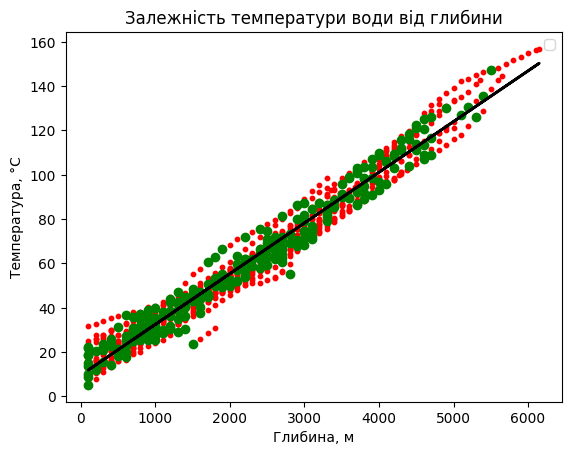

In [4]:
plt.scatter(X_train, y_train, color='r', s=10)
plt.scatter(X_test, y_test, color='g')

Y_pred = linear_regressor.predict(X)

plt.plot(X, Y_pred, color='k', linewidth=2)

plt.title('Залежність температури води від глибини')
plt.xlabel('Глибина, м')
plt.ylabel('Температура, °C')

plt.legend()

plt.show()

In [5]:
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_predict), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_predict), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_predict), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_predict), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_predict), 2))

Linear regressor performance:
Mean absolute error = 4.55
Mean squared error = 32.26
Median absolute error = 3.88
Explain variance score = 0.97
R2 score = 0.97
